In [7]:
# Text processing designation and description 
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data 
df = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/rakuten-product-classification/Untitled/processed_data.csv')
X_test = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/X_test_update.csv', index_col='Unnamed: 0')
y_train = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/Y_train_CVw08PX.csv', index_col='Unnamed: 0')

# Feature Training Data info
display(df.head(10))
df.info()

,productid,imageid,designation_description,cleaned,category
0,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...,olivia personalisiertes notizbuch seiten punkt...,Books & Stationery
1,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,journal de art le n du lart et son marche salo...,Books & Stationery
2,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,grand stylet ergonomique bleu gamepad nintendo...,Toys & Games
3,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...,peluche donald europe disneyland marionnette d...,Toys & Games
4,278535884,1077757786,La Guerre Des Tuques Luc a des id&eacute;es de...,la guerre de tuques luc de ides de grandeur il...,Toys & Games
5,5862738,393356830,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,afrique contemporaine n hiver dossier japon af...,Seasonal
6,91920807,907794536,Christof E: Bildungsprozessen Auf Der Spur,christof e bildungsprozessen auf der spur,Uncategorized
7,344240059,999581347,Conquérant Sept Cahier Couverture Polypro 240 ...,conqurant sept cahier couverture polypro x mm ...,Furniture & Decor
8,4239126071,1325918866,Puzzle Scooby-Doo Avec Poster 2x35 Pieces,puzzle scoobydoo avec poster x piece,Toys & Games
9,3793572222,1245644185,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,tente pliante vspro pvc blanc x longueur large...,Home & Garden


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   productid                84916 non-null  int64 
 1   imageid                  84916 non-null  int64 
 2   designation_description  84916 non-null  object
 3   cleaned                  84916 non-null  object
 4   category                 84916 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.2+ MB


In [28]:
# Removing french stopwords 
import pandas as pd

# List of common French stop words (you can extend this list as needed)
french_stopwords = [
    'x', 'cm', 'votre', 'ou', 'coleur', 'pa', 'peut', 'mm', 'l','de', 'le', 'la', 'les', 'et', 'pour', 'un', 'une', 'du', 'des', 'en', 'avec', 'que', 
    'rc', 'an', 'description', 'type', 'mesure', 'raison', 'inclus', 'neuf', 'dune','son', 'sans', 'facile', 'h', 'sont', 'tre', 'haute', 'caractristiques', 'est', 'sur', 'dans', 'ce', 'ces', 'à', 'au', 'aux', 'par', 'qui', 'il', 'elle', 'nous', 
    'qualit', 'vos', 'se', 'sil', 'couleur', 'dimension', 'vous', 'ils', 'elles', 'ne', 'pas', 'plus', 'non', 'un', 'une', 'être', 'avoir', 'ça', 
    'v', 'dun', 'mode', 'bb', 'cette', 'taille', 'trs', 'g', 'led', 'type', 'comprend', 'il', 'elle', 'aussi', 'même', 'autre', 'tout', 'tous', 'toutes', 'quel', 'quelle', 'quelques',
    'cela', 'donc', 'mais', 'si', 'là', 'voilà', 'sous', 'avant', 'après', 'comme', 'parce', 'où', 'enfin'
]

# Function to clean and remove stop words from the 'cleaned' column
def remove_stopwords(text):
    # Split text into words and filter out stop words
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in french_stopwords]
    return ' '.join(filtered_words)

# Apply the function to the 'cleaned' column
df['cleaned_no_stopwords'] = df['cleaned'].apply(remove_stopwords)

# Now, you can check the updated dataframe
df[['cleaned', 'cleaned_no_stopwords']].head()


,cleaned,cleaned_no_stopwords
0,olivia personalisiertes notizbuch seiten punkt...,olivia personalisiertes notizbuch seiten punkt...
1,journal de art le n du lart et son marche salo...,journal art n lart marche salon dart asiatique...
2,grand stylet ergonomique bleu gamepad nintendo...,grand stylet ergonomique bleu gamepad nintendo...
3,peluche donald europe disneyland marionnette d...,peluche donald europe disneyland marionnette d...
4,la guerre de tuques luc de ides de grandeur il...,guerre tuques luc ides grandeur veut organiser...


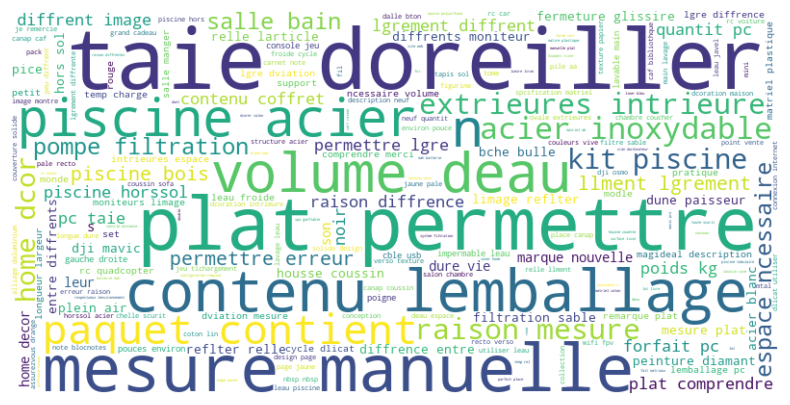

In [22]:
# Visualization of Textual data 

# Word Frequency Distribution (Word cloud)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text data into a single string
text = " ".join(df['cleaned_no_stopwords'].dropna())

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for this plot
plt.show();

<Figure size 1000x600 with 0 Axes>

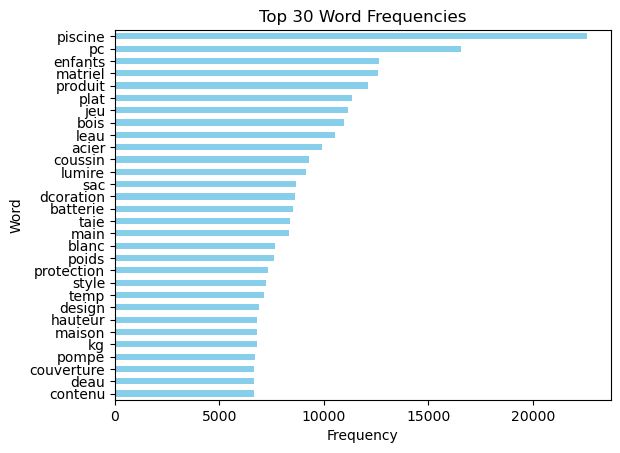

In [29]:
# Word Cloud by Chart
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Tokenize the text (split into words)
words = " ".join(df['cleaned_no_stopwords'].dropna()).split()

# Count word frequencies
word_counts = Counter(words)

# Convert to a pandas DataFrame for easy plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

# Plot top 20 words
plt.figure(figsize=(10, 6))
word_counts_df.head(30).plot(kind='barh', x='Word', y='Frequency', legend=False, color='skyblue')
plt.title('Top 30 Word Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()
plt.show();


<Figure size 1000x600 with 0 Axes>

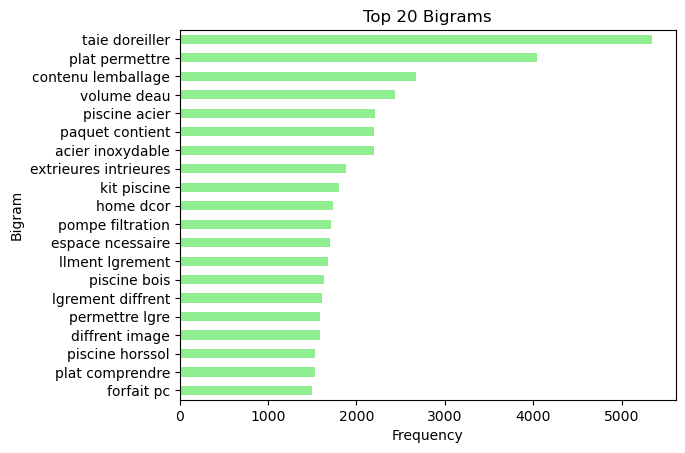

In [30]:
# Most Common N-grams (Bigrams)

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['cleaned_no_stopwords'].dropna())

# Get the top 20 bigrams
bigrams = vectorizer.get_feature_names_out()
bigram_counts = X.toarray().sum(axis=0)

# Create a DataFrame of bigram counts
bigram_df = pd.DataFrame(list(zip(bigrams, bigram_counts)), columns=['Bigram', 'Frequency'])
bigram_df = bigram_df.sort_values(by='Frequency', ascending=False)

# Plot the top 20 bigrams
plt.figure(figsize=(10, 6))
bigram_df.head(20).plot(kind='barh', x='Bigram', y='Frequency', legend=False, color='lightgreen')
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.gca().invert_yaxis()
plt.show();


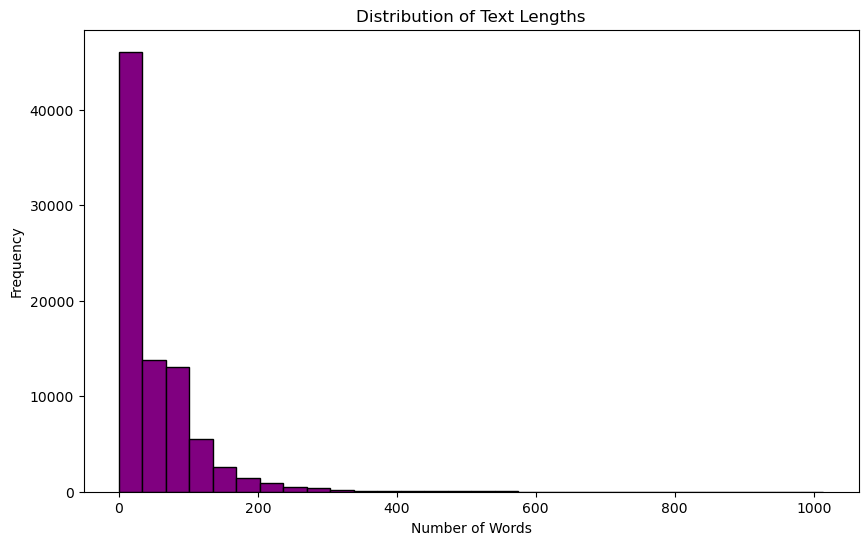

In [31]:
# Text Length Distribution
# Calculate the length of each entry in the 'designation_description' column
df['text_length'] = df['cleaned_no_stopwords'].dropna().apply(lambda x: len(x.split()))

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
df['text_length'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show();


In [32]:
# TF-IDF Visualization
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
X_tfidf = vectorizer.fit_transform(df['cleaned'].dropna())

# Convert to DataFrame, each word is a row, and each column corresponds to a document
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Optionally, you can sum the TF-IDF scores for each term across all documents
tfidf_sum = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Display top 20 words based on their total TF-IDF score
print(tfidf_sum.head(20))



: 

/var/folders/z4/tms7jyg136v2x9gmjn8y6pd40000gn/T/ipykernel_15541/3095311673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


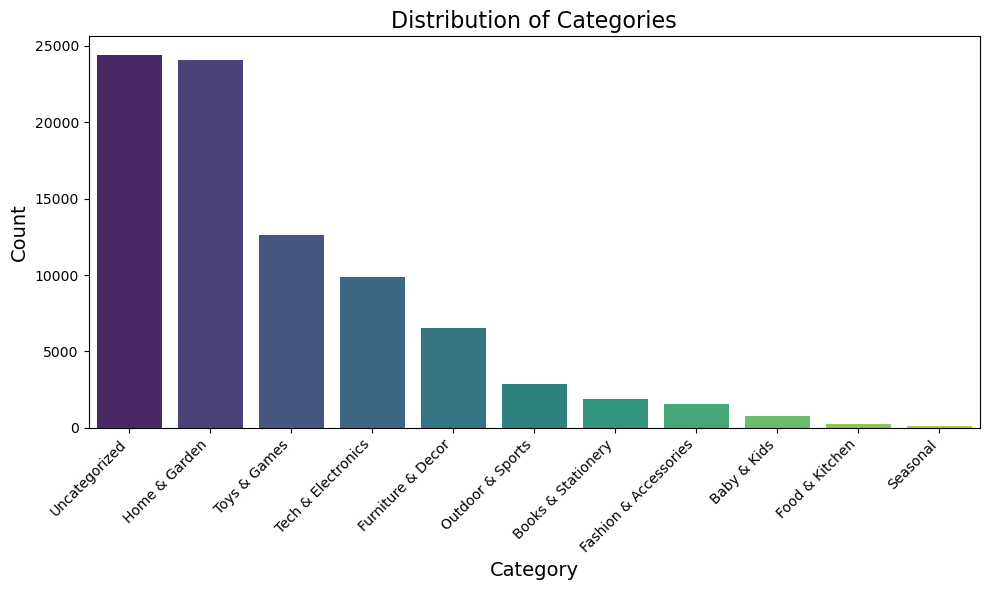

In [9]:
# Category Distribution 

# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Add titles and labels
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show();
